<a href="https://colab.research.google.com/github/Dfgr109109/proyecto/blob/main/Capitulo_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2.	Suponga que desea utilizar Programación Genética para encontrar el diseño de un circuito lógico, tome como, ejemplo  el  codificador de 7 segmentos. Describa el conjunto de terminales, el conjunto de funciones y la función de aptitud. Use una librería de Python.

In [4]:
# ✅ INSTALAR LIBRERÍA
!pip install deap --quiet

import operator
import random
import numpy as np
from deap import base, creator, tools, gp
import matplotlib.pyplot as plt

# ====== TABLA DE VERDAD DEL DECODIFICADOR DE 7 SEGMENTOS ======
# Entradas (A, B, C, D): 4 bits para representar números del 0 al 9
entradas = [list(map(int, format(i, "04b"))) for i in range(10)]

# Salidas esperadas para cada segmento a-g
# Referencia: https://en.wikipedia.org/wiki/Seven-segment_display#Displaying_digits
# Cada fila: [a, b, c, d, e, f, g]
salidas = [
    [1,1,1,1,1,1,0],  # 0
    [0,1,1,0,0,0,0],  # 1
    [1,1,0,1,1,0,1],  # 2
    [1,1,1,1,0,0,1],  # 3
    [0,1,1,0,0,1,1],  # 4
    [1,0,1,1,0,1,1],  # 5
    [1,0,1,1,1,1,1],  # 6
    [1,1,1,0,0,0,0],  # 7
    [1,1,1,1,1,1,1],  # 8
    [1,1,1,1,0,1,1]   # 9
]

# ====== DEFINIR PRIMITIVAS GP ======
pset = gp.PrimitiveSet("MAIN", 4)  # 4 inputs: A, B, C, D

# Operadores lógicos
pset.addPrimitive(operator.and_, 2)
pset.addPrimitive(operator.or_, 2)
pset.addPrimitive(operator.not_, 1)
pset.addPrimitive(operator.xor, 2)

# Constantes lógicas
pset.addTerminal(0)
pset.addTerminal(1)

# Renombrar inputs
pset.renameArguments(ARG0='A')
pset.renameArguments(ARG1='B')
pset.renameArguments(ARG2='C')
pset.renameArguments(ARG3='D')

# ====== DEFINIR INDIVIDUO Y APTITUD ======
if "FitnessMin" in creator.__dict__:
    del creator.FitnessMin
if "Individual" in creator.__dict__:
    del creator.Individual

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genFull, pset=pset, min_=1, max_=3)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

# ====== FUNCIÓN DE APTITUD PARA UN SEGMENTO ======
def evaluar(individuo, segmento_index):
    func = toolbox.compile(expr=individuo)
    error = 0
    for i in range(10):
        entrada = entradas[i]
        salida_esperada = salidas[i][segmento_index]
        try:
            salida = func(*entrada)
            if salida != salida_esperada:
                error += 1
        except:
            error += 1
    return (error,)

toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

# ====== EJECUTAR GP PARA CADA SEGMENTO (a-g) ======
MEJORES = []

for segmento in range(7):
    print(f"\n🔧 Evolucionando segmento {chr(97 + segmento)}:")
    toolbox.register("evaluate", evaluar, segmento_index=segmento)

    pop = toolbox.population(n=100)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values[0])
    stats.register("min", np.min)
    stats.register("avg", np.mean)

    from deap import algorithms
    pop, log = algorithms.eaSimple(pop, toolbox, 0.5, 0.2, 40,
                                   stats=stats, halloffame=hof, verbose=False)

    best_ind = hof[0]
    print(f"✅ Árbol lógico (error={best_ind.fitness.values[0]}):\n{best_ind}")
    MEJORES.append(best_ind)

# ====== RESULTADO FINAL ======
print("\n📌 Expresiones lógicas evolutivas para los segmentos a-g:")
for i, ind in enumerate(MEJORES):
    print(f"Segmento {chr(97+i)}: {ind}")



🔧 Evolucionando segmento a:
✅ Árbol lógico (error=1.0):
or_(or_(xor(D, C), not_(and_(B, 1))), xor(and_(xor(D, A), or_(0, 0)), D))

🔧 Evolucionando segmento b:
✅ Árbol lógico (error=0.0):
and_(or_(and_(0, xor(xor(not_(A), xor(A, B)), or_(0, 1))), not_(and_(B, xor(D, and_(C, xor(and_(A, A), or_(0, 1))))))), not_(or_(0, and_(B, or_(A, A)))))

🔧 Evolucionando segmento c:
✅ Árbol lógico (error=0.0):
or_(or_(not_(C), D), B)

🔧 Evolucionando segmento d:
✅ Árbol lógico (error=0.0):
or_(xor(xor(xor(or_(xor(not_(not_(D)), and_(and_(or_(A, B), xor(C, C)), 0)), C), B), xor(1, C)), or_(A, A)), xor(xor(D, B), xor(1, C)))

🔧 Evolucionando segmento e:
✅ Árbol lógico (error=0.0):
and_(not_(xor(D, D)), not_(or_(or_(and_(D, D), and_(B, 0)), xor(D, xor(and_(B, C), and_(1, B))))))

🔧 Evolucionando segmento f:
✅ Árbol lógico (error=1.0):
or_(not_(or_(C, D)), or_(B, and_(D, A)))

🔧 Evolucionando segmento g:
✅ Árbol lógico (error=1.0):
xor(A, and_(or_(B, 1), or_(B, C)))

📌 Expresiones lógicas evolutivas para

## 3.	Suponga que tiene un robot que le entrega galletas al grupo de ingenieros de diseño de robots. Programe por PG el recorrido del robot, teniendo en cuenta que cada vez que un ingeniero recibe una galleta gana puntos. Los ingenieros están distribuidos en una sala cuadrada. Defina, conjunto de terminales, conjunto de funciones y función de aptitud.

/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	max
0  	100   	2  
1  	60    	2  
2  	64    	2  
3  	65    	2  
4  	66    	2  
5  	79    	3  
6  	63    	3  
7  	74    	3  
8  	59    	3  
9  	70    	3  
10 	47    	3  
11 	77    	3  
12 	74    	3  
13 	66    	3  
14 	55    	3  
15 	61    	3  
16 	61    	3  
17 	68    	3  
18 	52    	3  
19 	63    	3  
20 	71    	3  
21 	66    	3  
22 	64    	3  
23 	67    	3  
24 	70    	3  
25 	66    	3  
26 	71    	3  
27 	57    	3  
28 	66    	3  
29 	73    	3  
30 	65    	3  
31 	70    	3  
32 	67    	3  
33 	64    	3  
34 	71    	3  
35 	67    	3  
36 	62    	3  
37 	64    	3  
38 	70    	3  
39 	69    	3  
40 	55    	3  

🏆 Recorrido óptimo (funciones):
['move_right', 'move_down', 'move_right', 'move_up', 'move_right', 'move_down', 'move_left', 'move_down', 'move_right', 'move_right', 'move_down', 'move_right', 'move_down', 'move_left', 'move_right', 'move_left', 'move_down', 'move_right', 'move_left', 'move_up', 'move_down', 'move_left', 'move_right', 'move_right', 'move_up', 'move_d

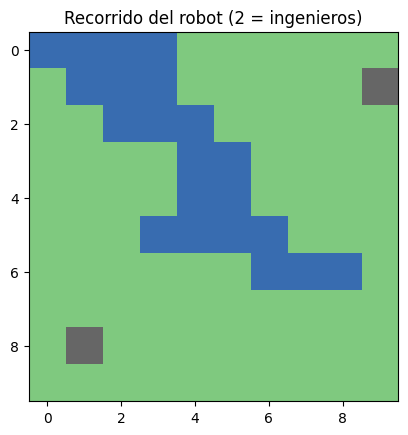

In [3]:
# ✅ INSTALAR LIBRERÍA
!pip install deap --quiet

import numpy as np
import random
import matplotlib.pyplot as plt
from deap import base, creator, tools

# ====== PARÁMETROS ======
TAMANO = 10
INGENIEROS = [(2, 3), (5, 5), (8, 1), (6, 8), (1, 9)]
INICIO = (0, 0)
PASOS = 30

# ====== MOVIMIENTOS ======
def move_up(pos): return (max(pos[0]-1, 0), pos[1])
def move_down(pos): return (min(pos[0]+1, TAMANO-1), pos[1])
def move_left(pos): return (pos[0], max(pos[1]-1, 0))
def move_right(pos): return (pos[0], min(pos[1]+1, TAMANO-1))

MOVS = [move_up, move_down, move_left, move_right]

# ====== GENÉTICA SIMPLE CON LISTAS DE FUNCIONES ======
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Crear un individuo: lista de funciones aleatorias
toolbox.register("attr_move", lambda: random.choice(MOVS))
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_move, PASOS)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# ====== FUNCIÓN DE APTITUD ======
def evaluar(ind):
    pos = INICIO
    entregados = set()
    for mov in ind:
        pos = mov(pos)
        if pos in INGENIEROS:
            entregados.add(pos)
    return (len(entregados),)  # más entregas = mejor

toolbox.register("evaluate", evaluar)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# ====== EVOLUCIÓN ======
pop = toolbox.population(n=100)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values[0])
stats.register("max", np.max)

from deap import algorithms
algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.3, ngen=40, stats=stats, halloffame=hof, verbose=True)

# ====== RESULTADOS ======
mejor = hof[0]
print("\n🏆 Recorrido óptimo (funciones):")
print([f.__name__ for f in mejor])

# Simular recorrido
pos = INICIO
historial = [pos]
for mov in mejor:
    pos = mov(pos)
    historial.append(pos)

print("\n📍 Posiciones visitadas:")
print(historial)

# ====== VISUALIZACIÓN ======
mapa = np.zeros((TAMANO, TAMANO), dtype=int)
for x, y in INGENIEROS:
    mapa[x][y] = 2  # ingenieros
for x, y in historial:
    mapa[x][y] = 1  # recorrido

plt.imshow(mapa, cmap="Accent", origin="upper")
plt.title("Recorrido del robot (2 = ingenieros)")
plt.show()

